# Classification of Loan Status
#In this notebook, I shall try to show a few ways to create a classification model.

Key Highlights will be :

1. Data Preparation
2. Visualization and Descriptive analytics (EDA)
3. Data Imputation
4. System of multiple models
5. System of multiple Model quality measure (accuracy score, f1 score, precision, recall)
6. Cross validation using K folds

DOnt forget to upvote if you find the notebook useful. Your comments and support will definitely act as a motivator and I shall publish more of my work.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv
/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv


In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv(r'/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv(r'/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv')

In [4]:
##checking the shape of both train and test dataset
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [5]:
##get the column names in the data
#although its quiet understood that the test data will not contain the label i.e. Loan Status , but still
#we shall take a look

cols_train = train.columns
cols_test = test.columns
print("Train data Column names : ")
print(cols_train)
print('_____________________________')
print("Train data Column names : ")
print(cols_test)

Train data Column names : 
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
_____________________________
Train data Column names : 
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
## Info about the data using .info and .describe
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

In [9]:
##describe
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [11]:
#converting Credit History to Object datatype as its of for 0 and 1
train['Credit_History'] = train['Credit_History'].astype('O')
test['Credit_History'] = test['Credit_History'].astype('O')

In [12]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #

In [13]:
## describe object type columns
train.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001643,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [14]:
# we will drop ID because it's not important for our model and it will just mislead the model

train.drop('Loan_ID', axis=1, inplace=True)
test.drop('Loan_ID', axis=1, inplace=True)

In [15]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [16]:
#check if we have any duplicate rows 
print(train.duplicated().any())
print(test.duplicated().any())

False
True


In [17]:
len(test)-len(test.drop_duplicates())

## dropping the duplicates in test data
test = test.drop_duplicates()
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

The percentage of Y class : 0.69
The percentage of N class : 0.31


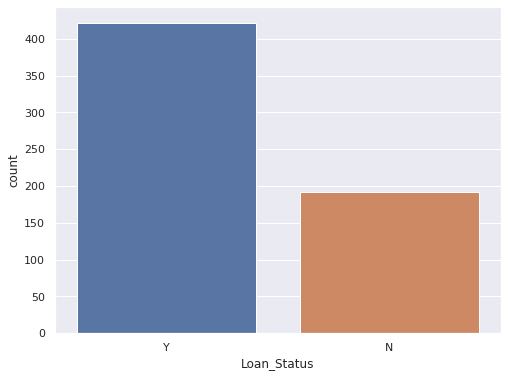

In [18]:
# let's look at the target percentage

plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.countplot(train['Loan_Status']);

print('The percentage of Y class : %.2f' % (train['Loan_Status'].value_counts()[0] / len(train)))
print('The percentage of N class : %.2f' % (train['Loan_Status'].value_counts()[1] / len(train)))

# We can consider it as imbalanced data, we shall use F1 Score, Precision and Recall to evaluate the Prediction

In [19]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


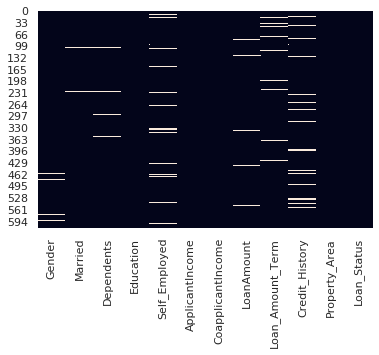

Percentage of Null cells : 
 
                    Null_percentage
Credit_History               8.14
Self_Employed                5.21
LoanAmount                   3.58
Dependents                   2.44
Loan_Amount_Term             2.28
Gender                       2.12
Married                      0.49


In [20]:
## finding the null values and treating them
heat = sns.heatmap(train.isnull(), cbar=False)
plt.show()
Null_percent = train.isna().mean().round(4)*100

Null_percent = pd.DataFrame({'Null_percentage' : Null_percent})
Null_percent.head()
Null_percent = Null_percent[Null_percent.Null_percentage > 0].sort_values(by = 'Null_percentage', ascending = False)
print("Percentage of Null cells : \n \n " , Null_percent)

In [21]:
null_klmns = Null_percent.index
null_klmns = list(null_klmns)
train[null_klmns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Credit_History    564 non-null    object 
 1   Self_Employed     582 non-null    object 
 2   LoanAmount        592 non-null    float64
 3   Dependents        599 non-null    object 
 4   Loan_Amount_Term  600 non-null    float64
 5   Gender            601 non-null    object 
 6   Married           611 non-null    object 
dtypes: float64(2), object(5)
memory usage: 33.7+ KB


In [22]:
#we shall separate the categorical and numeric columns
cat_data = []
num_data = []

for i,c in enumerate(train.dtypes):
    if c == object:
        cat_data.append(train.iloc[:, i])
    else :
        num_data.append(train.iloc[:, i])

cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [23]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


ApplicantIncome


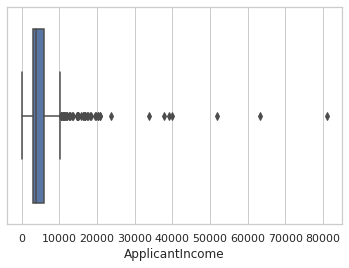

CoapplicantIncome


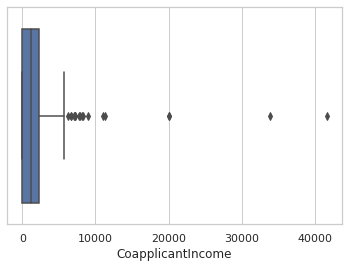

LoanAmount


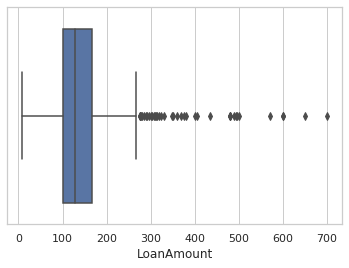

Loan_Amount_Term


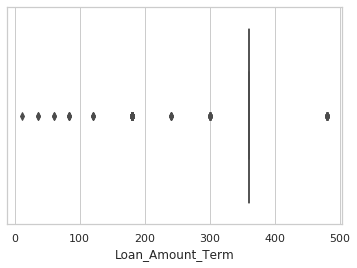

Gender


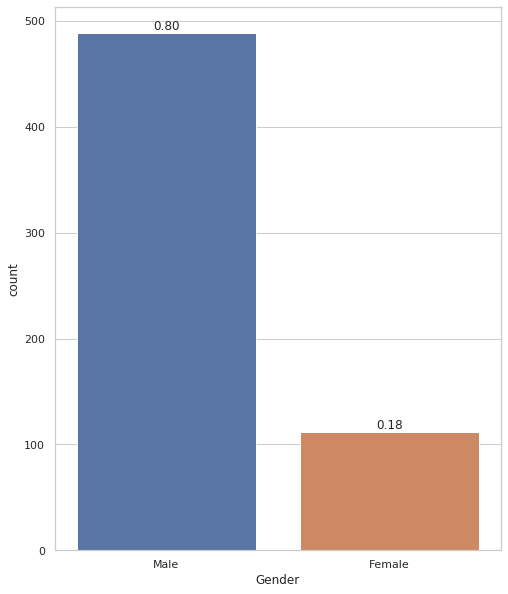

Married


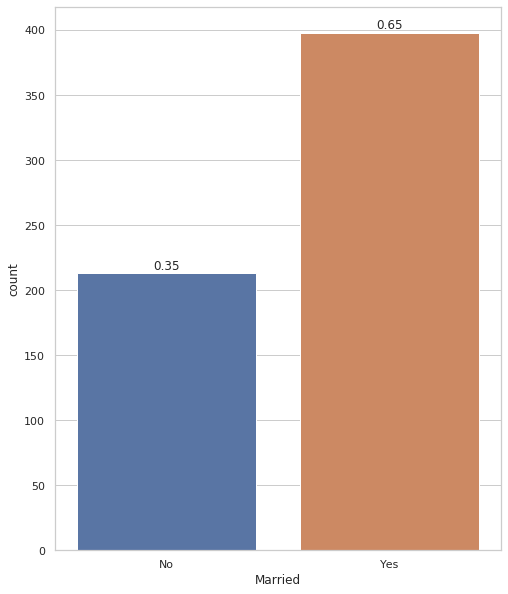

Dependents


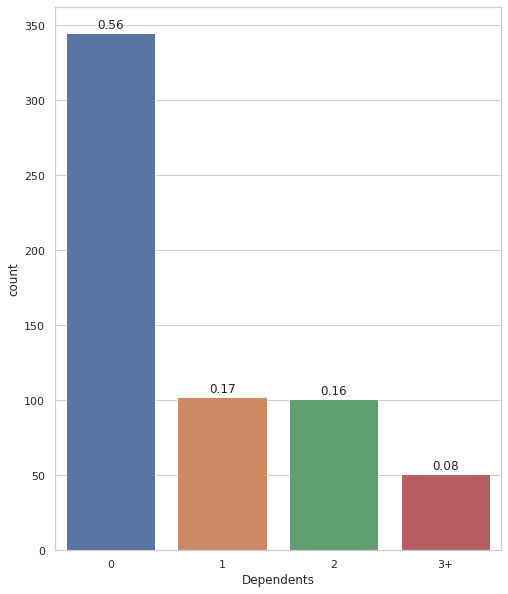

Education


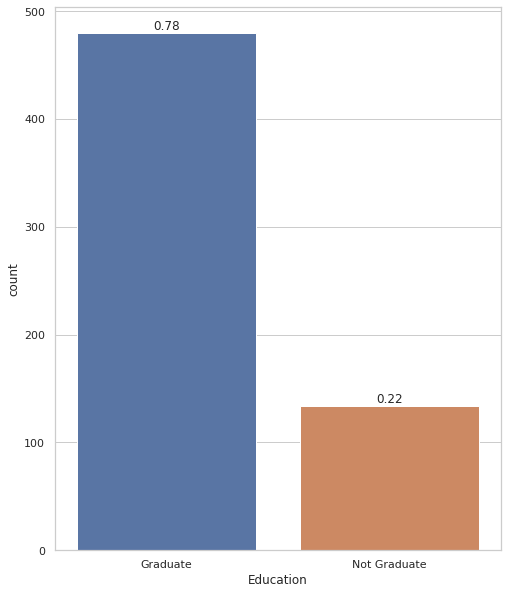

Self_Employed


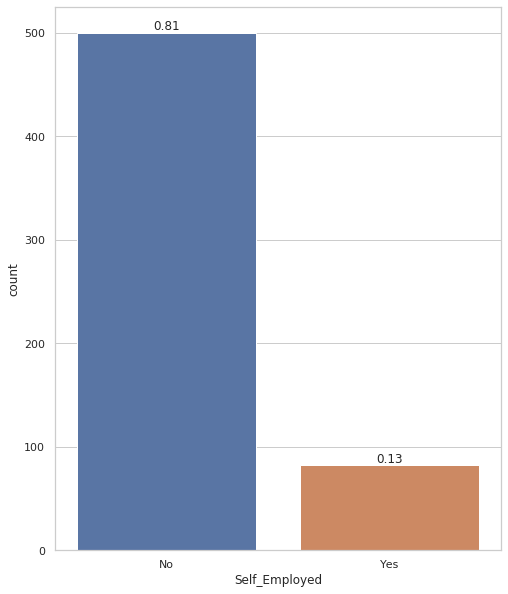

Credit_History


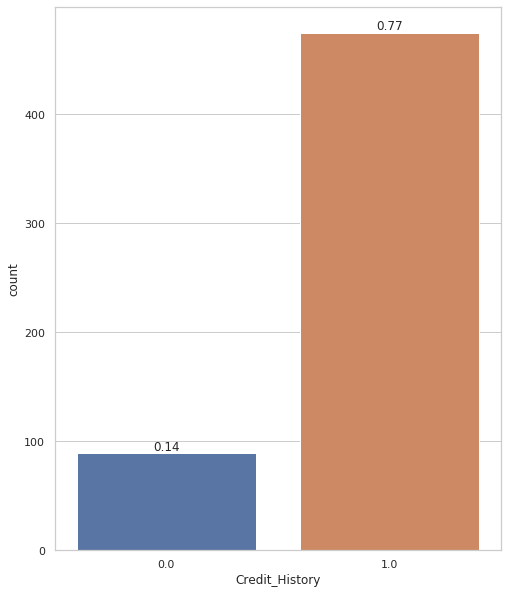

Property_Area


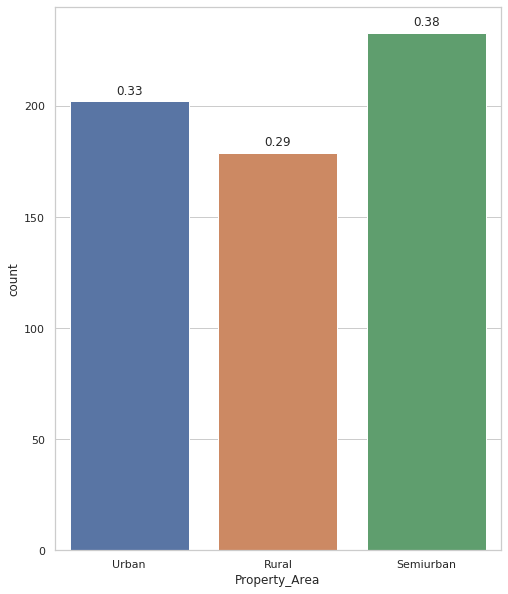

Loan_Status


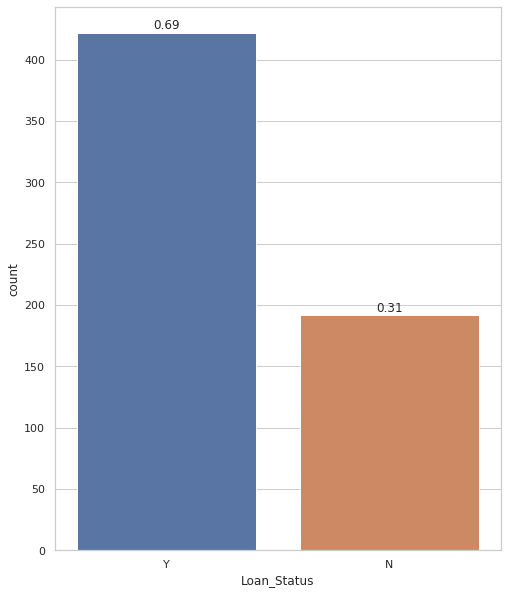

In [24]:
##EDA for numerical data
for i in num_data.columns:
    print(i)
    sns.set(style="whitegrid")
    sns.boxplot(num_data[i])
    plt.show()
    
##EDA for categorical data
for i in cat_data.columns:
    print(i)
    total = float(len(cat_data))
    plt.figure(figsize=(8,10))
    sns.set(style="whitegrid")
    ax = sns.countplot(cat_data[i])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 
    plt.show()

Gender


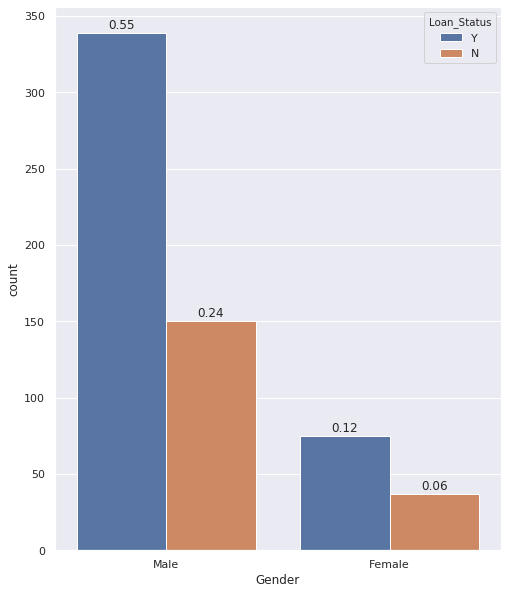

Married


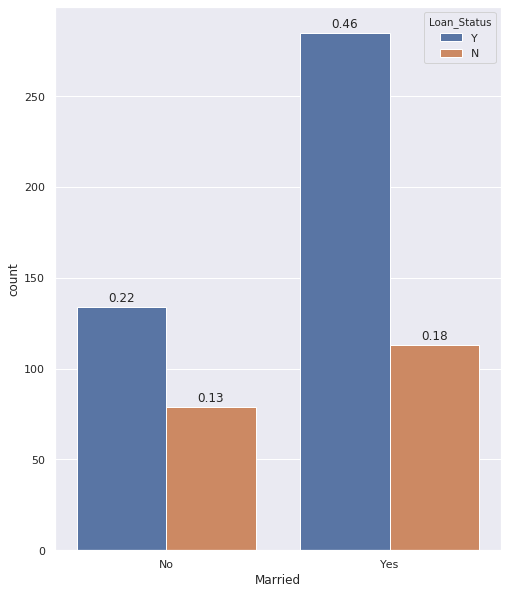

Dependents


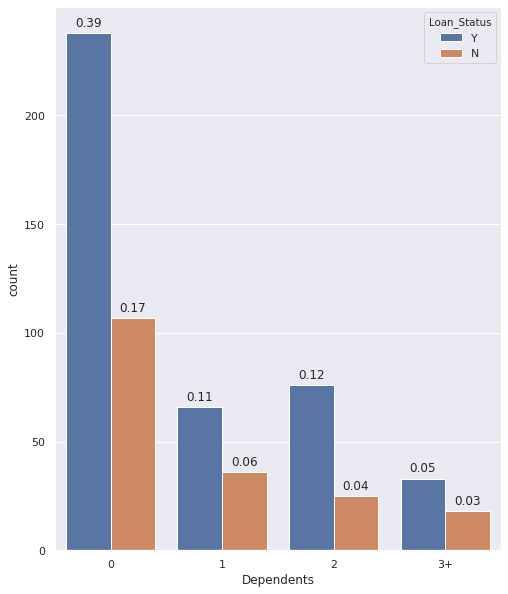

Education


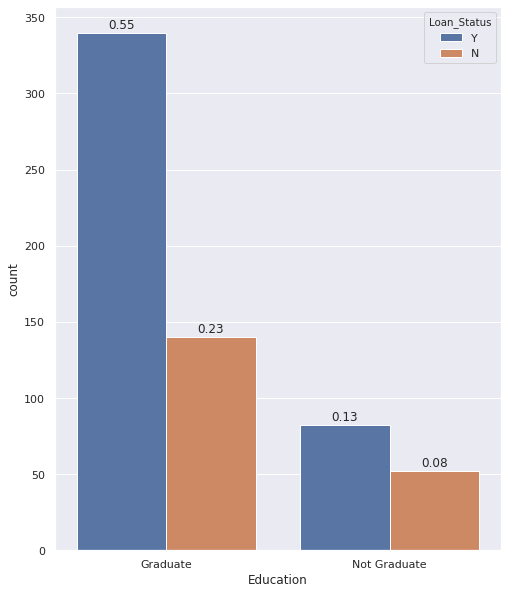

Self_Employed


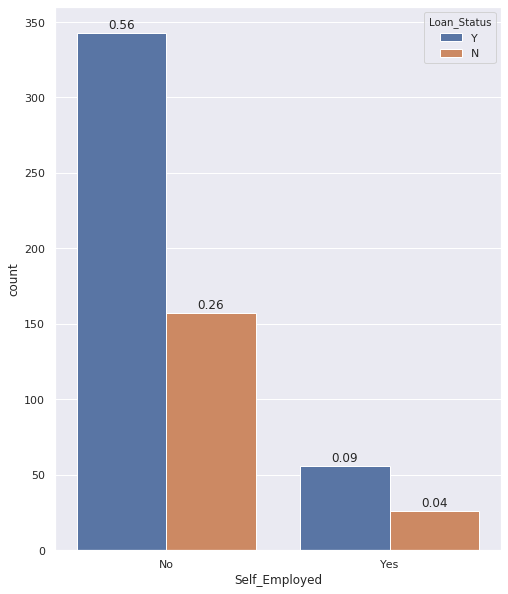

Credit_History


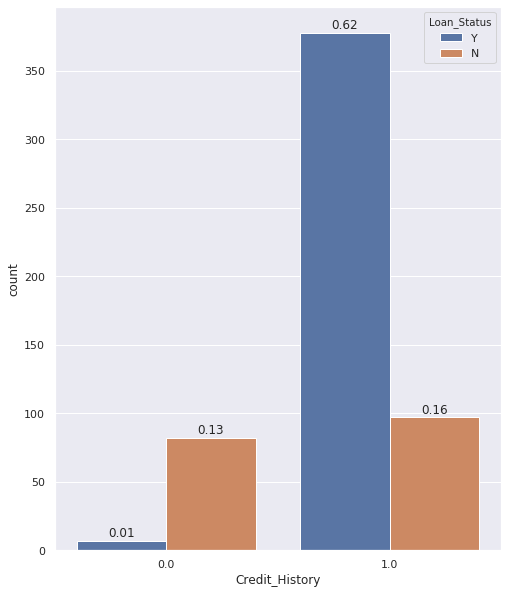

Property_Area


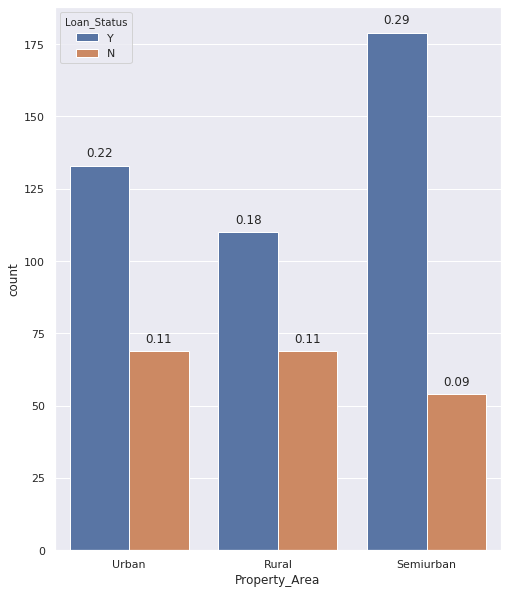

Loan_Status


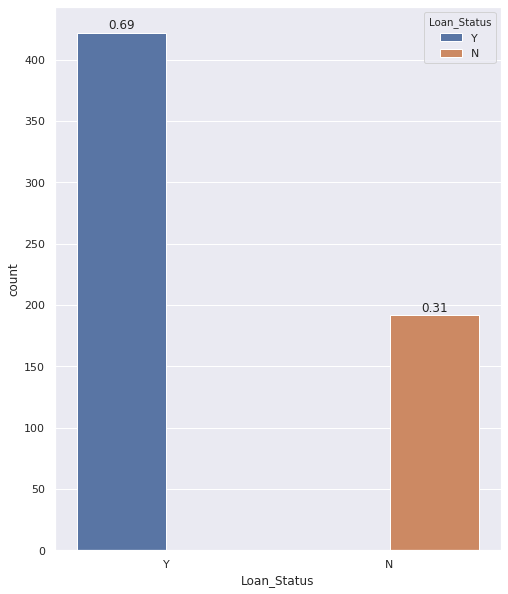

In [25]:
## EDA on categorical data relative to Loan Status
##EDA for categorical data
for i in cat_data.columns:
    print(i)
    total = float(len(cat_data))
    plt.figure(figsize=(8,10))
    sns.set(style="darkgrid")
    ax = sns.countplot(x = i, hue = 'Loan_Status', data = cat_data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 
    plt.show()
    
#from the corresponding charts one can gain a lot of important info

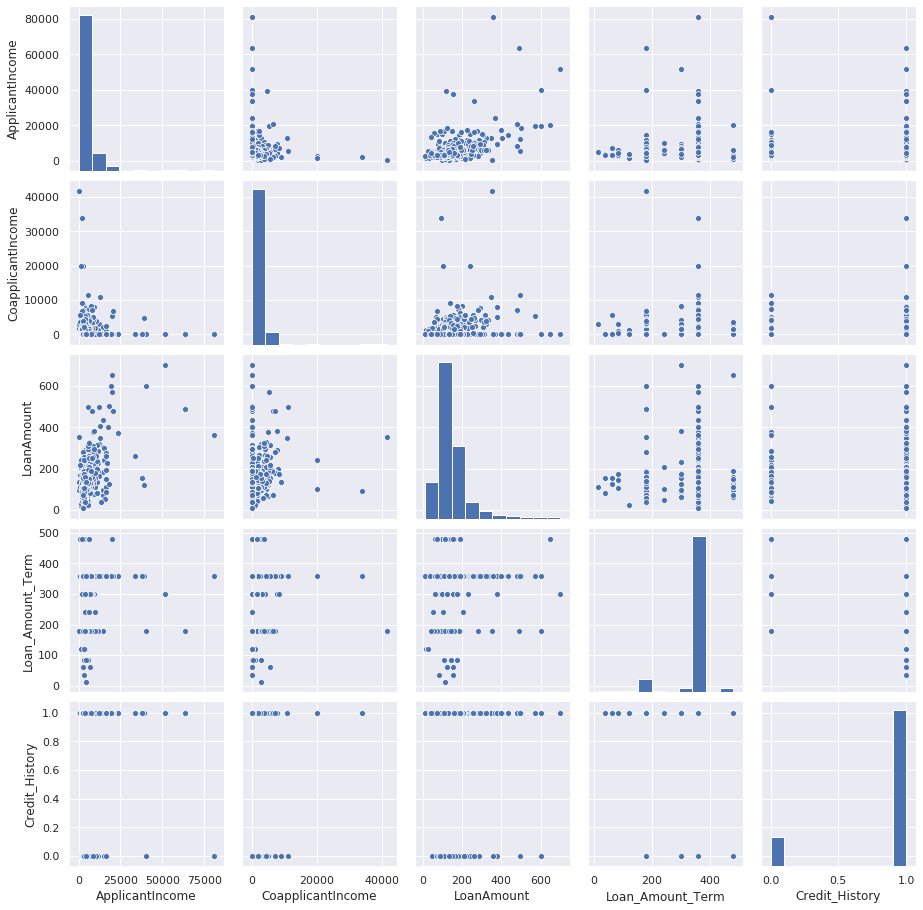

In [26]:
##creating a pair plot
sns.pairplot(train)
plt.show()

In [27]:
## Data Imputation
# for cat_data

# If you want to fill every column with its own most frequent value you can use

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data

False

In [28]:
#num_data
##as we have many outliers in columns with Numerical data, we shall impute the blank cells with the median of their respective columns

num_data.fillna(num_data.median(), inplace=True)
num_data.isnull().sum().any() # no more missing data 
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,128.0,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [29]:
## num_data has certain columns with some very high valued columns and some very low, thus we 
#should standardize the values of these columns

for col in num_data.columns:
    num_data[col] = (num_data[col]-num_data[col].min())/(num_data[col].max() - num_data[col].min())
    
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.070489,0.000000,0.172214,0.74359
1,0.054830,0.036192,0.172214,0.74359
2,0.035250,0.000000,0.082489,0.74359
3,0.030093,0.056592,0.160637,0.74359
4,0.072356,0.000000,0.191027,0.74359


In [30]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [31]:
# transform the target column

target_values = {'Y': 1 , 'N' : 0}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [32]:
# transform other columns

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [33]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [34]:
df = pd.concat([cat_data, num_data, target], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,0.070489,0.000000,0.172214,0.74359,1
1,1,1,1,0,0,1,0,0.054830,0.036192,0.172214,0.74359,0
2,1,1,0,0,1,1,2,0.035250,0.000000,0.082489,0.74359,1
3,1,1,0,1,0,1,2,0.030093,0.056592,0.160637,0.74359,1
4,1,0,0,0,0,1,2,0.072356,0.000000,0.191027,0.74359,1


In [35]:
#confirming if we have any null values

df.isna().any()

#so we are good to model

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
Credit_History       False
Property_Area        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Loan_Status          False
dtype: bool

In [36]:
## Creating our variable and target dataset
X = pd.concat([cat_data, num_data], axis=1)
y = target

In [37]:
# we will use 4 different models for training

## ---------------------------All in one modelling---------------------------

from sklearn.model_selection import train_test_split  #to split the dataset for training and testing
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit


In [38]:
# we will use StratifiedShuffleSplit to split the data Taking into consideration that we will get the same ratio on the target column

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


We shall use 4 different models

In [39]:
models = {
    'LogisticRegression': LogisticRegression(random_state=34),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors= 5),
    'SVC': SVC(random_state=34),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=34)
}

Creating a function to calculate various accuracy measures

In [40]:
# loss

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [41]:
# train_eval_train

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)

# we can see that best model is LogisticRegression at least for now, SVC is just memorizing the data so it is overfitting .

LogisticRegression :
  pre: 0.781
  rec: 0.982
  f1: 0.870
  loss: 6.964
  acc: 0.798
------------------------------
KNeighborsClassifier :
  pre: 0.787
  rec: 0.967
  f1: 0.868
  loss: 6.964
  acc: 0.798
------------------------------
SVC :
  pre: 0.783
  rec: 0.982
  f1: 0.871
  loss: 6.894
  acc: 0.800
------------------------------
DecisionTreeClassifier :
  pre: 0.781
  rec: 0.982
  f1: 0.870
  loss: 6.964
  acc: 0.798
------------------------------


In [42]:
X_train.shape

(491, 11)

Train cross validation model

In [43]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)
        
train_eval_cross(models, X, y, skf)

# ohhh, as i said SVC is just memorizing the data, and you can see that here DecisionTreeClassifier is better than LogisticRegression

LogisticRegression :
 pre     0.790816
 rec     0.983389
 f1      0.876545
 loss    6.581871
 acc     0.809439
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.764289
 rec     0.926467
 f1      0.837251
 loss    8.547180
 acc     0.752538
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.790816
 rec     0.983389
 f1      0.876545
 loss    6.581871
 acc     0.809439
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.790816
 rec     0.983389
 f1      0.876545
 loss    6.581871
 acc     0.809439
Name: 0, dtype: float64
------------------------------
